In [2]:
# Load libraries
import pandas as pd
from pandas import set_option
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv("./datasets/diabetes.csv")
df_name=df.columns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.inspection import permutation_importance
from pdpbox import pdp, get_dataset, info_plots
def find_best_k(X, y, max_k=20, cv=5):
    """
    Find the best k value for KNN classifier using cross-validation.
    
    Parameters:
    - X: Input features
    - y: Target variable
    - max_k: Maximum value of k to try (default: 20)
    - cv: Number of folds for cross-validation (default: 5)
    
    Returns:
    - best_k: Best value of k
    - best_accuracy: Cross-validation accuracy with the best k
    - best_model: Best KNN model with the best k
    """
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define a range of k values to try
    k_values = list(range(1, max_k + 1))

    # Dictionary to store mean cross-validation accuracies for each k
    cv_scores = {}

    # Perform cross-validation for each k
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X_train, y_train, cv=cv)
        cv_scores[k] = np.mean(scores)

    # Find the best k based on cross-validation scores
    best_k = max(cv_scores, key=cv_scores.get)
    best_accuracy = cv_scores[best_k]

    # Train the best KNN model on the full training set
    best_model = KNeighborsClassifier(n_neighbors=best_k)
    best_model.fit(X_train, y_train)

    return best_k, best_accuracy, best_model
X =  df[df_name[0:8]]
Y = df[df_name[8]]
X_train, X_test, y_train, y_test =train_test_split(X,Y,
                                                   shuffle=True,
                                                   test_size=0.25,
                                                   random_state=42,
                                                   stratify=df['Outcome'])
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train,y_train)
preds_dt = dt_model.predict(X_test)
print("The test accuracy score of Decision Tree is ",
      accuracy_score(y_test, preds_dt), f1_score(y_test, preds_dt, average='macro'))

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train,y_train)
preds_lr = lr_model.predict(X_test)
print("The test accuracy score of logistic regression is ",
      accuracy_score(y_test, preds_lr), f1_score(y_test, preds_lr, average='macro'))


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)
preds_rf = rf_model.predict(X_test)
print("The test accuracy score of Decision Tree is ",
      accuracy_score(y_test, preds_rf), f1_score(y_test, preds_rf, average='macro'))


xgb_model = xgboost.XGBClassifier(n_estimators=100, random_state=1)
xgb_model.fit(X_train,y_train)
preds_xgb = xgb_model.predict(X_test)
print("The test accuracy score of XGBoost is ",
      accuracy_score(y_test, preds_xgb), f1_score(y_test, preds_xgb, average='macro'))

best_k, best_accuracy, knn_model = find_best_k(X, Y)
knn_model.fit(X_train,y_train)
preds_knn = knn_model.predict(X_test)
print("The test accuracy score of knn is ",
      accuracy_score(y_test, preds_knn), f1_score(y_test, preds_knn, average='macro'))

# instantiating the object and fitting
svm_model = SVC(kernel='rbf', C=1, random_state=42).fit(X_train, y_train)

# predicting the values
y_pred_svm = svm_model.predict(X_test)

# displaying the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(
    y_test, y_pred_svm), f1_score(y_test, y_pred_svm, average='macro'))
perm_importance = permutation_importance(
    svm_model, X_test, y_test, n_repeats=50, random_state=42)
knn_model_perm_importance = permutation_importance(
    knn_model, X_test, y_test, n_repeats=50, random_state=42)

# Get feature importances
rf_importances = rf_model.feature_importances_
xgb_importances = xgb_model.feature_importances_
svm_importances = perm_importance
logireg_importances = np.abs(lr_model.coef_[0])

# Create a DataFrame with feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'RandomForest': rf_importances,
    'DecissionTree': dt_model.feature_importances_,
    'XGBoost': xgb_importances,
    'Logistice Regression': logireg_importances,
    'Support Vector Mcahine': svm_importances.importances_mean,
    'K Nearest Neighbor': knn_model_perm_importance.importances_mean,
})

display(feature_importances)



The test accuracy score of Decision Tree is  0.75 0.7116756350894757
The test accuracy score of logistic regression is  0.7447916666666666 0.6958784548246323
The test accuracy score of Decision Tree is  0.75 0.7116756350894757
The test accuracy score of XGBoost is  0.734375 0.7045529976163896
The test accuracy score of knn is  0.7135416666666666 0.661961010275617
The test accuracy score of SVM is  0.75 0.7116756350894757


,Feature,RandomForest,DecissionTree,XGBoost,Logistice Regression,Support Vector Mcahine,K Nearest Neighbor
0,Pregnancies,0.090802,0.058974,0.119897,1.527750,0.010000,-0.014375
1,Glucose,0.279030,0.339264,0.269815,4.507572,0.092396,0.070000
2,BloodPressure,0.084731,0.097375,0.087276,0.442006,0.018333,0.008021
3,SkinThickness,0.066548,0.023690,0.056380,0.126747,0.001458,-0.022813
4,Insulin,0.071515,0.078565,0.083429,0.244240,0.002708,-0.006146
5,BMI,0.159337,0.168434,0.152763,3.020432,0.008229,0.008750
6,DiabetesPedigreeFunction,0.123345,0.117931,0.095564,1.126841,0.012083,-0.010625
7,Age,0.124691,0.115767,0.134877,0.926553,0.017708,0.015625


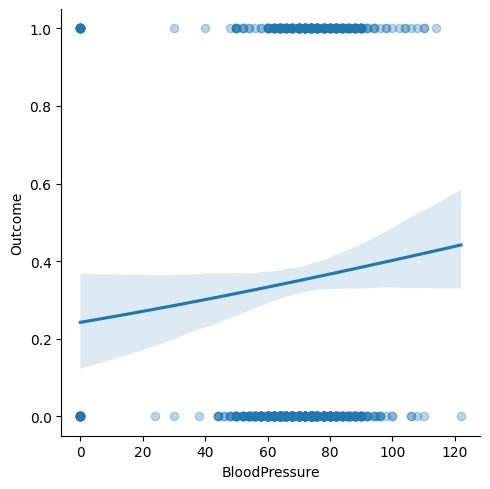

In [72]:
import seaborn as sns
# Assuming 'data' contains your dataset
sns.lmplot(x='BloodPressure', y='Outcome', data=df, logistic=True, scatter_kws={'alpha':0.3})

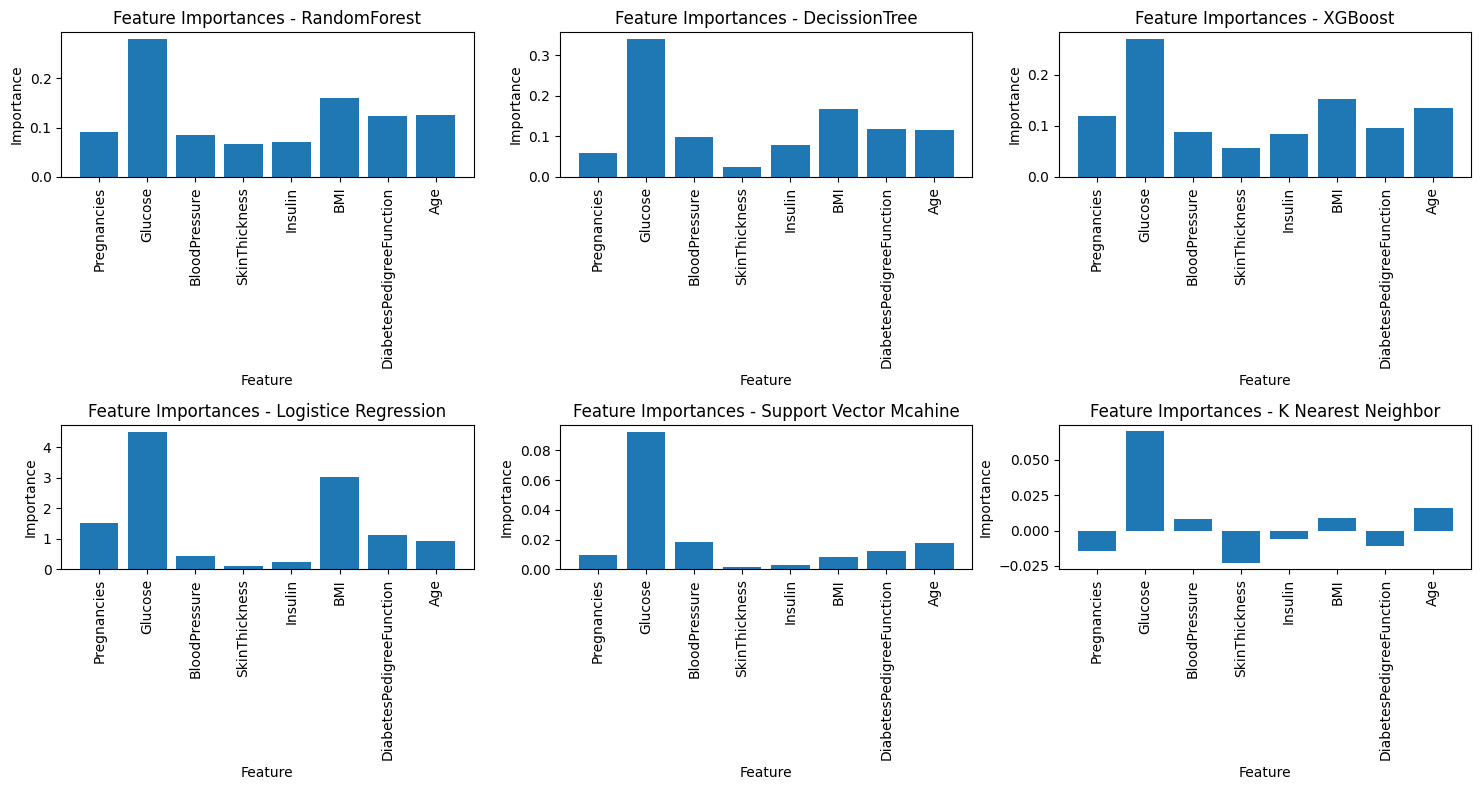

In [3]:



import matplotlib.pyplot as plt

# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8), constrained_layout=True)

# Plotting feature importances for each model
for i, model in enumerate(feature_importances.columns[1:]):
    ax = axes.flatten()[i]
    ax.bar(feature_importances['Feature'], feature_importances[model])
    ax.set_title(f'Feature Importances - {model}')
    ax.set_xlabel('Feature')
    ax.set_ylabel('Importance')
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels by 90 degrees
plt.tight_layout()
plt.show()




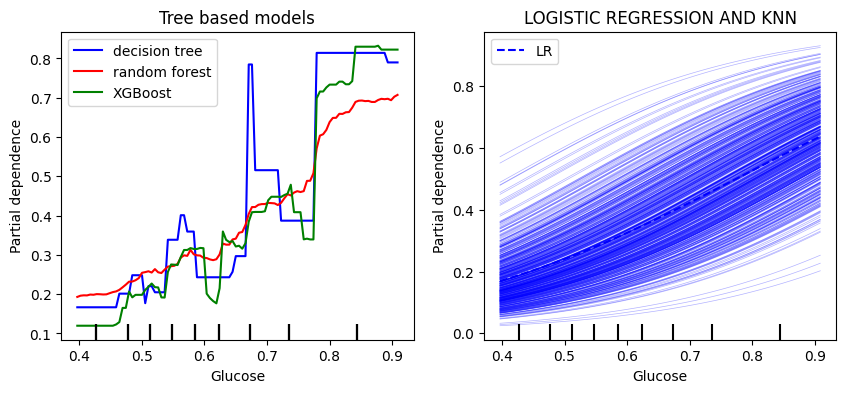

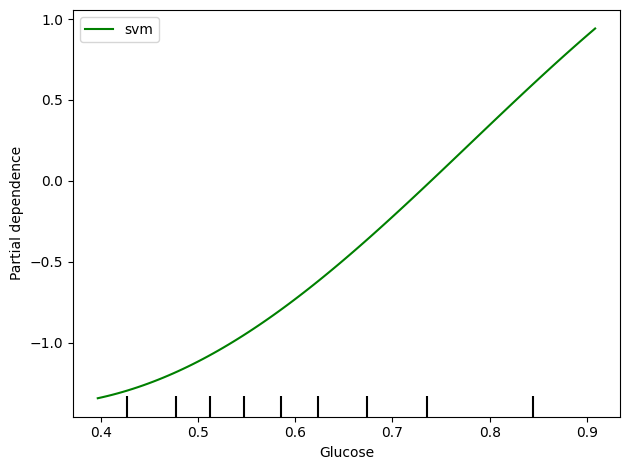

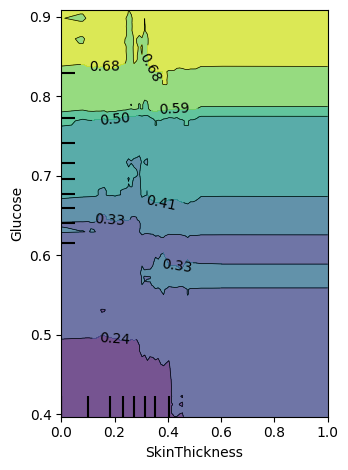

In [74]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
feature_names = [1]
# Decision Tree

# Generating some sample data
x = np.linspace(0, 10, 100)
y1_sin = np.sin(x)
y2_sin = np.sin(x + np.pi/2)  # Second sine wave shifted by pi/2

y1_cos = np.cos(x)
y2_cos = np.cos(x + np.pi/4)  # Second cosine wave shifted by pi/4

# Creating subplots side by side
plt.figure(figsize=(10, 4))  # Adjust the figure size as needed

# First subplot with two lines for sine waves
ax = plt.subplot(1, 2, 1)  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(dt_model, X_train, features=feature_names,feature_names=X.columns, ax=ax,line_kw={"color": "blue","label": "decision tree"})
PartialDependenceDisplay.from_estimator(rf_model, X_train, features=feature_names,feature_names=X.columns, ax=disp.axes_,line_kw={"color": "red","label": "random forest"})
PartialDependenceDisplay.from_estimator(xgb_model, X_train, features=feature_names,feature_names=X.columns, ax=disp.axes_,line_kw={"color": "green","label": "XGBoost"})
plt.legend()  # Show legend
plt.title('Tree based models')
# Second subplot with two lines for cosine waves
ax = plt.subplot(1, 2, 2)  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(lr_model, X_train,kind="both", features=feature_names,feature_names=X.columns, ax=ax,line_kw={"color": "blue","label": "LR"})
# PartialDependenceDisplay.from_estimator(knn_model, X_train, features=feature_names,feature_names=X.columns, ax=disp.axes_,line_kw={"color": "red","label": "KNN"})

plt.legend()  # Show legend
plt.title('LOGISTIC REGRESSION AND KNN')
plt.show()
ax = plt.subplot(1, 1, 1)  # (rows, columns, index)
PartialDependenceDisplay.from_estimator(svm_model, X_train, features=feature_names,feature_names=X.columns, ax=ax,line_kw={"color": "green","label": "svm"})
plt.tight_layout()  # Adjust spacing between plots for better appearance
plt.show()

ax5 = plt.subplot(1, 2, 1)  # (rows, columns, index)
PartialDependenceDisplay.from_estimator(rf_model, X_train, features=[(3,1)],feature_names=X.columns, ax=ax5,line_kw={"color": "red","label": "random forest"})
plt.tight_layout()  # Adjust spacing between plots for better appearance
plt.show()


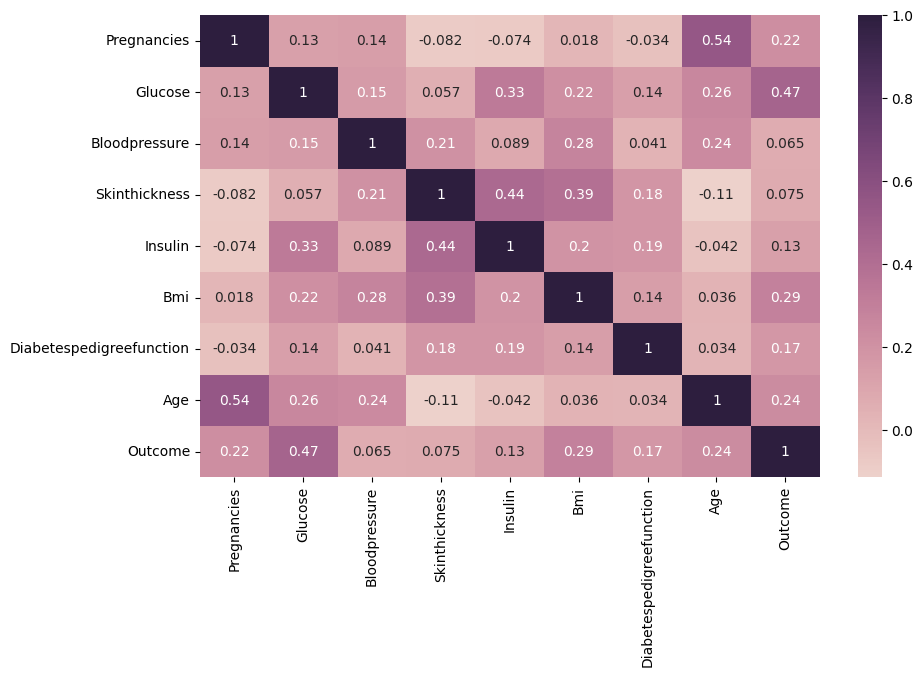

In [75]:
import seaborn as sns
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

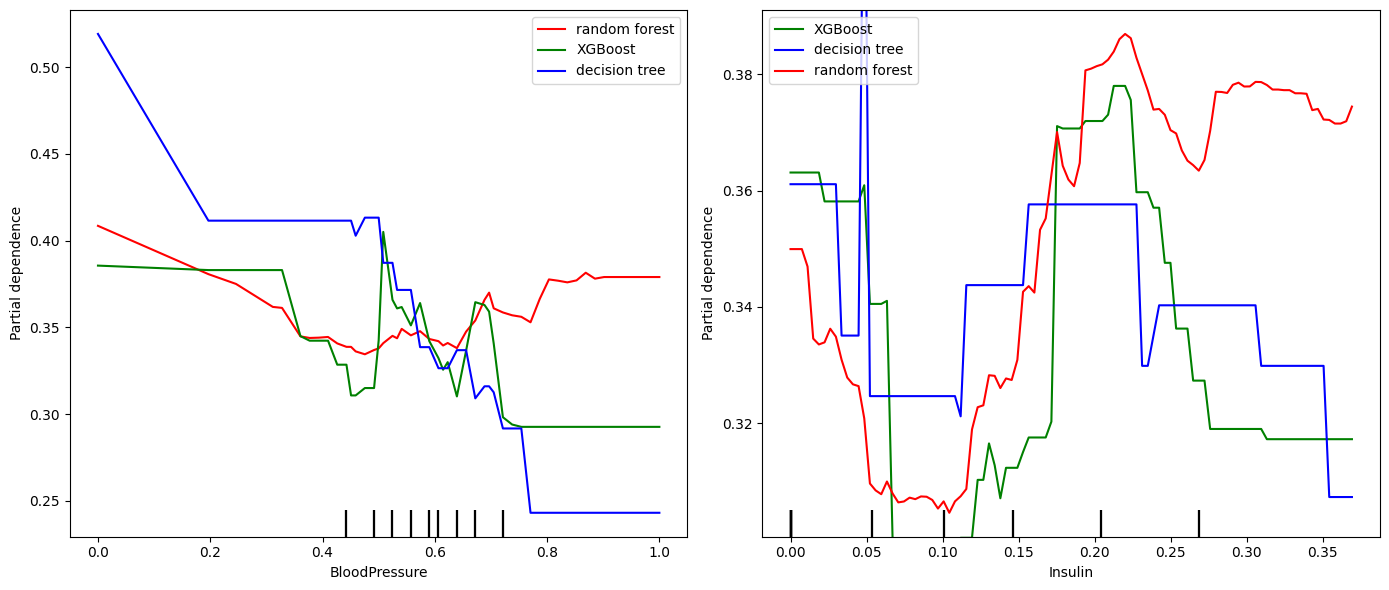

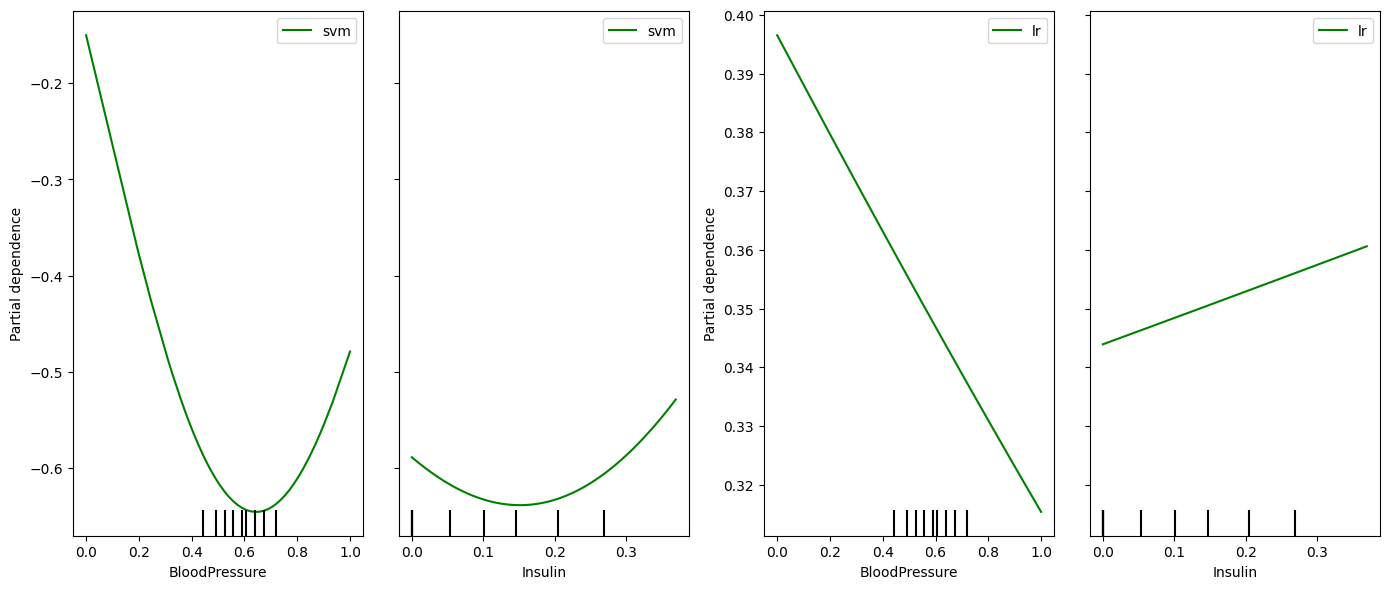

In [76]:

feature_names = [2,4]
plt.figure(figsize=(14, 6))
ax = plt.subplot(1, 2, 1)  # (rows, columns, index)
disp1 =PartialDependenceDisplay.from_estimator(rf_model, X_train, features=[2],feature_names=X.columns, ax=ax,line_kw={"color": "red","label": "random forest"})
PartialDependenceDisplay.from_estimator(xgb_model, X_train, features=[2],feature_names=X.columns, ax=disp1.axes_,line_kw={"color": "green","label": "XGBoost"})
PartialDependenceDisplay.from_estimator(dt_model, X_train, features=[2],feature_names=X.columns, ax=disp1.axes_,line_kw={"color": "blue","label": "decision tree"})

ax2 = plt.subplot(1, 2, 2)  # (rows, columns, index)
disp2 =PartialDependenceDisplay.from_estimator(xgb_model, X_train, features=[4],feature_names=X.columns, ax=ax2,line_kw={"color": "green","label": "XGBoost"})
PartialDependenceDisplay.from_estimator(dt_model, X_train, features=[4],feature_names=X.columns, ax=disp2.axes_,line_kw={"color": "blue","label": "decision tree"})
PartialDependenceDisplay.from_estimator(rf_model, X_train, features=[4],feature_names=X.columns, ax=disp2.axes_,line_kw={"color": "red","label": "random forest"})
plt.tight_layout()  # Adjust spacing between plots for better appearance
plt.show()

plt.figure(figsize=(14, 6))
ax3 = plt.subplot(1, 2, 1)  # (rows, columns, index)
PartialDependenceDisplay.from_estimator(svm_model, X_train, features=feature_names,feature_names=X.columns, ax=ax3,line_kw={"color": "green","label": "svm"})
ax4 = plt.subplot(1, 2, 2)  # (rows, columns, index)
PartialDependenceDisplay.from_estimator(lr_model, X_train, features=feature_names,feature_names=X.columns, ax=ax4,line_kw={"color": "green","label": "lr"})
plt.tight_layout()  # Adjust spacing between plots for better appearance
plt.show()


In [77]:
# instantiating the object and fitting
X_train_ = np.delete(X_train,2,axis = 1)
X_test_ = np.delete(X_test,2,axis = 1)

svm_model = SVC(kernel='rbf', C=1, random_state=42).fit(X_train_, y_train)

# predicting the values
y_pred_svm = svm_model.predict(X_test_)

# displaying the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(
    y_test, y_pred_svm), f1_score(y_test, y_pred_svm, average='macro'))
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_,y_train)
preds_lr = lr_model.predict(X_test_)
print("The test accuracy score of logistic regression is ",
      accuracy_score(y_test, preds_lr), f1_score(y_test, preds_lr, average='macro'))

The test accuracy score of SVM is  0.7239583333333334 0.6802312792634257
The test accuracy score of logistic regression is  0.7395833333333334 0.6881091617933723


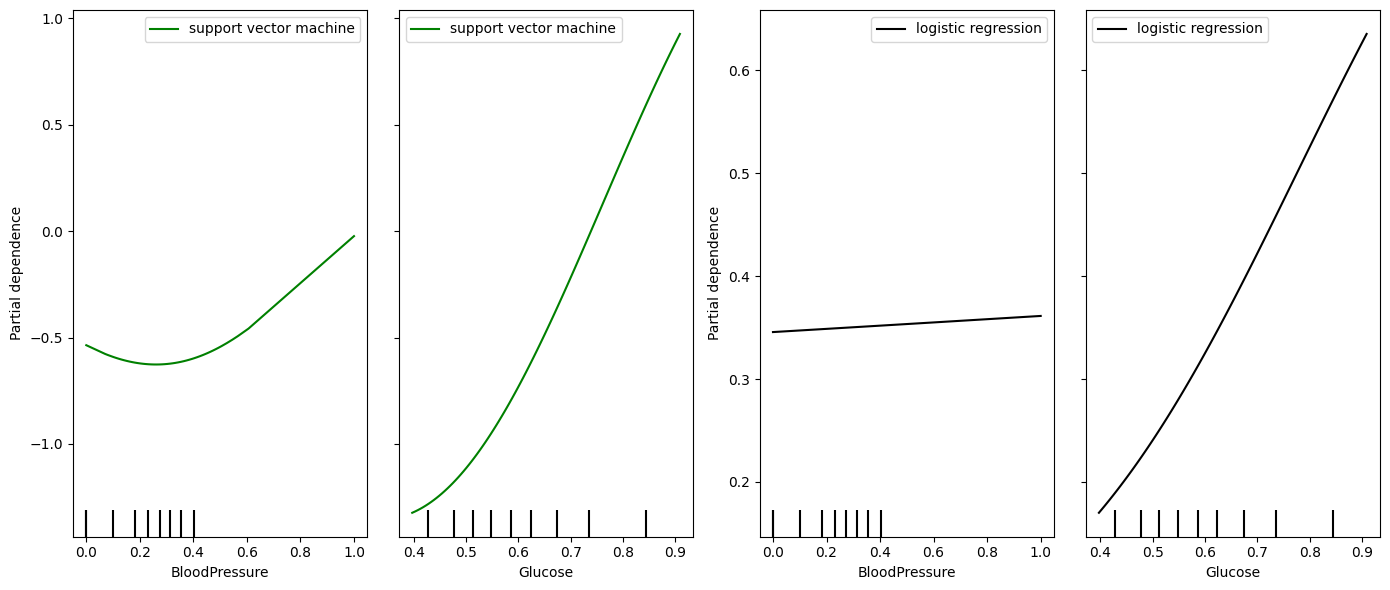

In [78]:
feature_names = [2,1]
plt.figure(figsize=(14, 6))
ax3 = plt.subplot(1, 2, 1)  # (rows, columns, index)
PartialDependenceDisplay.from_estimator(svm_model, X_train_, features=feature_names,feature_names=X.columns, ax=ax3,line_kw={"color": "green","label": "support vector machine"})
ax4 = plt.subplot(1, 2, 2)  # (rows, columns, index)
PartialDependenceDisplay.from_estimator(lr_model, X_train_, features=feature_names,feature_names=X.columns, ax=ax4,line_kw={"color": "black","label": "logistic regression"})
plt.tight_layout()  # Adjust spacing between plots for better appearance
plt.show()